# Usando Sktime

In [14]:
import numpy as np
from sktime.datasets import load_airline, load_lynx, load_longley
from sktime.utils.plotting import plot_series
from sktime.forecasting.base import ForecastingHorizon
from sktime.forecasting.model_selection import temporal_train_test_split
from sktime.forecasting.theta import ThetaForecaster
from sktime.performance_metrics.forecasting import mean_absolute_percentage_error

## 1.- Preparando los datos

In [2]:
y = load_airline()
y.head()

Period
1949-01    112.0
1949-02    118.0
1949-03    132.0
1949-04    129.0
1949-05    121.0
Freq: M, Name: Number of airline passengers, dtype: float64

(<Figure size 1152x288 with 1 Axes>,
 <AxesSubplot:ylabel='Number of airline passengers'>)

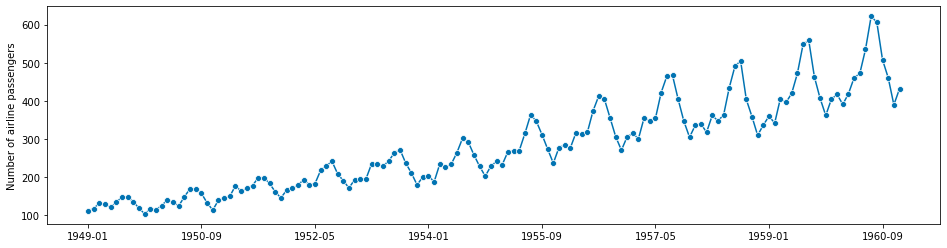

In [3]:
plot_series(y)

In [22]:
y_train, y_test = temporal_train_test_split(y)
print(f'Train: {y_train.shape[0]} - Test: {y_test.shape[0]}')

Train: 108 - Test: 36


(<Figure size 1152x288 with 1 Axes>,
 <AxesSubplot:ylabel='Number of airline passengers'>)

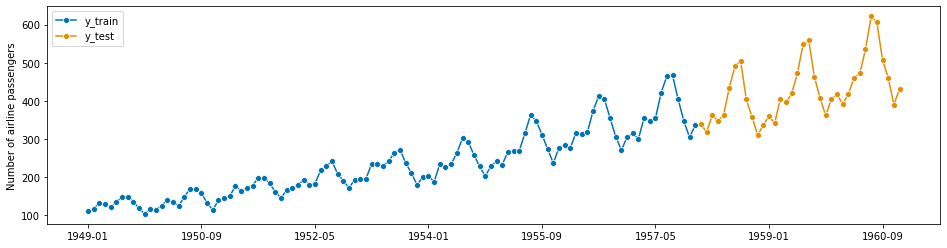

In [24]:
plot_series(y_train, y_test, labels=['y_train', 'y_test'])

## 2.- Especificar el horizonte de pronostico

In [25]:
# Hacer pronostico para y_test desde y_train
fh = ForecastingHorizon(y_test.index, is_relative=False)
# fh = np.arange(1, 37)

## 3.- Especificar el algoritmo de pronostico

In [33]:
forecaster = ThetaForecaster(sp=12)
forecaster.fit(y_train)

ThetaForecaster(sp=12)

## 4.- Solicitud de pronostico

(<Figure size 1152x288 with 1 Axes>,
 <AxesSubplot:ylabel='Number of airline passengers'>)

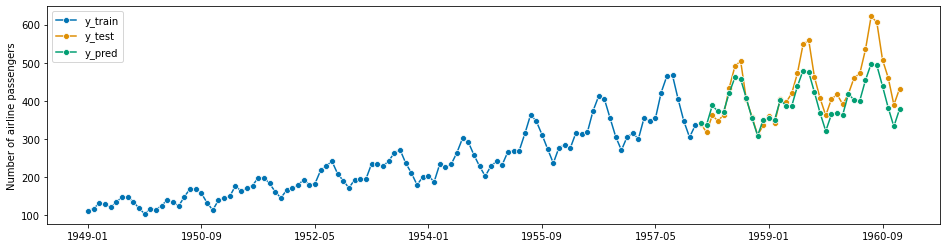

In [34]:
y_pred = forecaster.predict(fh)
plot_series(y_train, y_test, y_pred, labels=['y_train', 'y_test', 'y_pred'])

## 5.- Pronostico probabilistico

In [29]:
mean_absolute_percentage_error(y_test, y_pred, symmetric=False)

0.08174636548841936

In [18]:
# Prediccion de intervalos
coverage = 0.9
y_pred_ints = forecaster.predict_interval(coverage=coverage)
y_pred_ints.head()

Coverage            
                0.9            
              lower       upper
1961-01  418.280121  464.281951
1961-02  402.215881  456.888055
1961-03  459.966113  522.110500
1961-04  442.589309  511.399214
1961-05  443.525028  518.409480

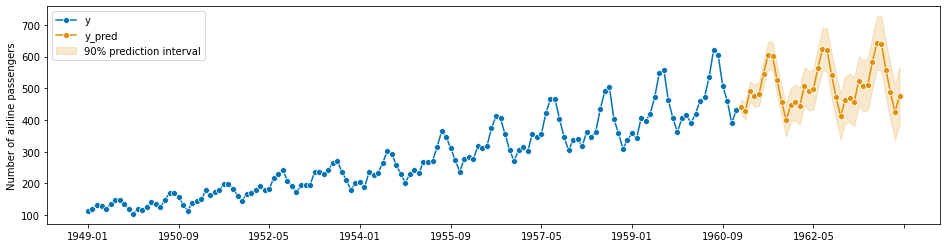

In [19]:
y_pred = forecaster.predict()

fix, ax = plot_series(y, y_pred, labels=['y', 'y_pred'], pred_interval=y_pred_ints)

In [21]:
# Prediccion de quantiles
y_pred_quant = forecaster.predict_quantiles(alpha=[0.275, 0.975])
y_pred_quant.head()

Quantiles            
              0.275       0.975
1961-01  432.922220  468.688317
1961-02  419.617696  462.124924
1961-03  479.746288  528.063108
1961-04  464.491077  517.990291
1961-05  467.360286  525.582418

alfa < 0.5: La predicción alfa-cuantil es igual al límite inferior de un intervalo predictivo con cobertura = ( 0.5 - alfa ) * 2

alfa > 0.5: La predicción alfa-cuantil es igual al límite superior de un intervalo predictivo con cobertura = ( alfa - 0.5 ) * 2

## Proceso completo

In [30]:
y_train, y_test = temporal_train_test_split(y)
fh = ForecastingHorizon(y_test.index, is_relative=False)
forecaster = ThetaForecaster(sp=12)  # monthly seasonal periodicity
forecaster.fit(y_train)
y_pred = forecaster.predict(fh)
mean_absolute_percentage_error(y_test, y_pred)

0.08174636548841936